In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Linear regression with one variable

In [2]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

### Ex. 1.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Ex. 2.

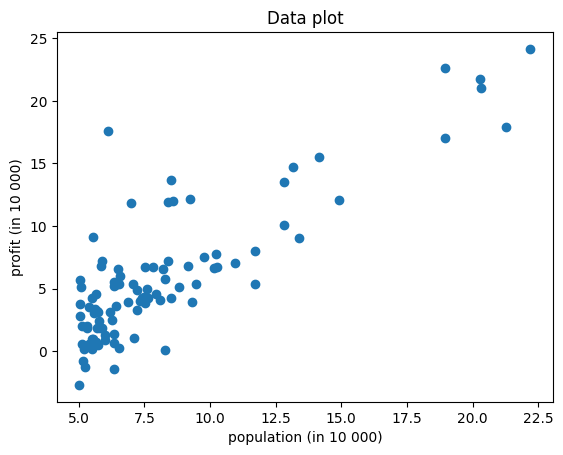

In [5]:
x = data.values[:, 0]
y = data.values[:, 1]

plt.scatter(x, y)
plt.title('Data plot')
plt.xlabel('population (in 10 000)')
plt.ylabel('profit (in 10 000)')
plt.show()

### Ex. 3. & 4.

In [6]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

### Ex. 5.

In [7]:
def computeCost(X, y, theta):
    m = X.shape[1]
    cost = (np.sum(X*theta, axis=0) - y)**2
        
    return np.sum(cost) / (2*m)

### Ex. 6.

In [8]:
print(computeCost(X, y, theta))

32.072733877455676


### Ex. 7.

In [9]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    m = X.shape[1]
    cost = np.array([])

    for i in range(it):
        new_theta = np.zeros((X.shape[0], 1))

        for j in range(X.shape[0]):
            new_theta[j] = theta[j] - alpha * np.sum((np.sum(X*theta, axis=0)-y) * X[j]) / m

        theta = new_theta
        cost = np.append(cost, computeCost(X, y, theta))

    return theta, cost

### Ex. 8. & 9.

In [10]:
alpha = 0.01
it = 1000

opt_theta, costs = simple_gradient(X, y, theta, alpha, it)

print('optimal theta:', opt_theta)
print('optimal cost:', costs[-1])

optimal theta: [[-3.24140214]
 [ 1.1272942 ]]
optimal cost: 4.515955503120292


### Ex. 10.

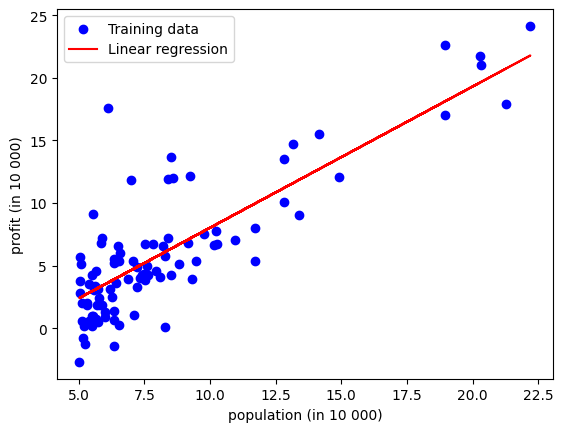

In [11]:
plt.scatter(x, y, color='blue', label='Training data')
plt.plot(x, np.sum(X * opt_theta, axis=0), color='red', label='Linear regression')
plt.xlabel('population (in 10 000)')
plt.ylabel('profit (in 10 000)')
plt.legend()
plt.show()

### Ex. 11.

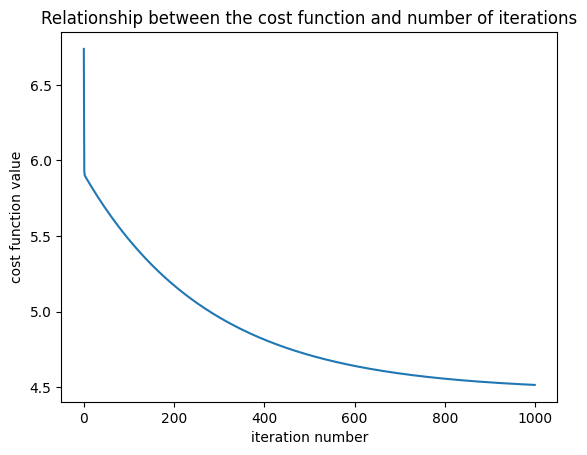

In [12]:
plt.plot(costs)
plt.title('Relationship between the cost function and number of iterations')
plt.ylabel('cost function value')
plt.xlabel('iteration number')
plt.show()

# Linear regression with multiple variables

In [13]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


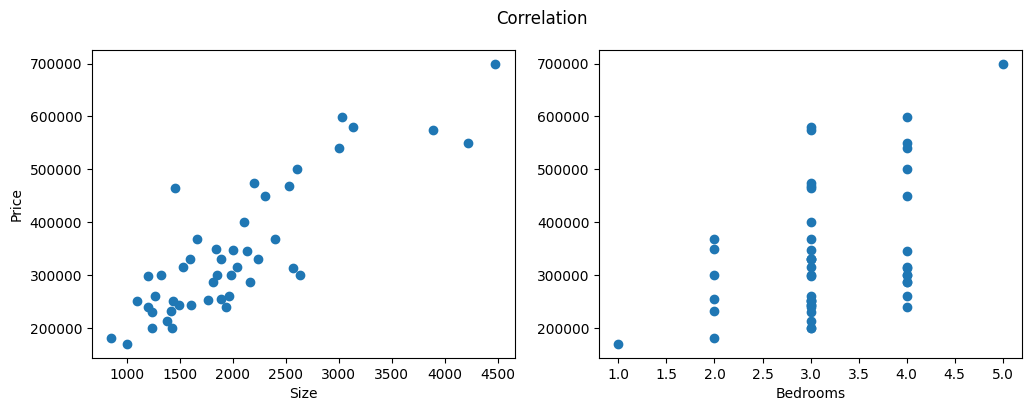

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(data2['Size'], data2['Price'])
axs[0].set_xlabel('Size')
axs[0].set_ylabel('Price')
axs[1].scatter(data2['Bedrooms'], data2['Price'])
axs[1].set_xlabel('Bedrooms')
fig.suptitle('Correlation')
plt.show()

### Ex. 1.

In [15]:
norm_Size = np.subtract(data2['Size'], np.mean(data2['Size'])) / np.std(data2['Size'])
norm_Bedrooms = np.subtract(data2['Bedrooms'], np.mean(data2['Bedrooms'])) / np.std(data2['Bedrooms'])
norm_Price = np.subtract(data2['Price'], np.mean(data2['Price'])) / np.std(data2['Price'])

### Ex. 2.

In [16]:
X = np.stack((np.ones(norm_Size.shape), norm_Size, norm_Bedrooms))
y = norm_Price.values
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [17]:
print('Cost function value with theta=0: ', computeCost(X, y, theta))

Cost function value with theta=0:  0.5


In [18]:
alpha = 0.01
it = 1000

opt_theta, costs = simple_gradient(X, y, theta, alpha, it)

print('optimal theta:', opt_theta)
print('optimal cost:', costs[-1])

optimal theta: [[-8.32667269e-17]
 [ 8.79065699e-01]
 [-4.74786542e-02]]
optimal cost: 0.13354178879076403


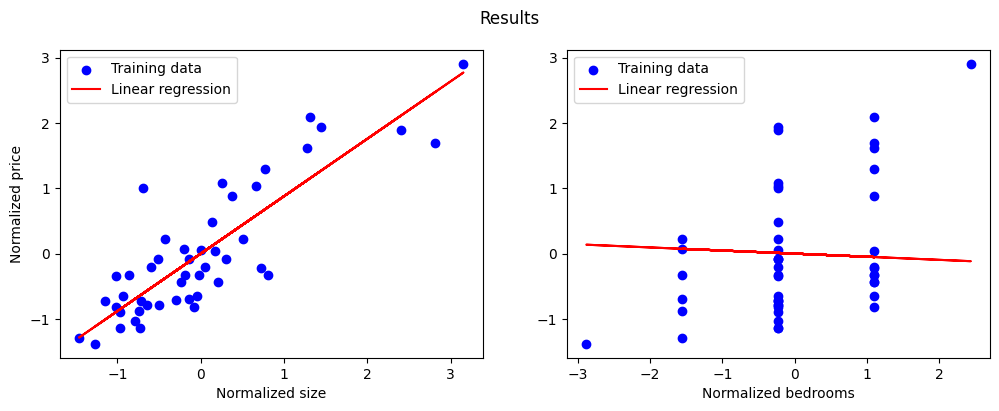

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(X[1, :], y, color='blue', label='Training data')
axs[0].plot(X[1, :], np.sum(X[0:2, :] * opt_theta[0:2], axis=0), color='red', label='Linear regression')
axs[0].set_xlabel('Normalized size')
axs[0].set_ylabel('Normalized price')
axs[0].legend()
axs[1].scatter(X[2, :], y, color='blue', label='Training data')
axs[1].plot(X[2, :], np.sum(X[::2, :] * opt_theta[::2], axis=0), color='red', label='Linear regression')
axs[1].set_xlabel('Normalized bedrooms')
axs[1].legend()
fig.suptitle('Results')
plt.show()

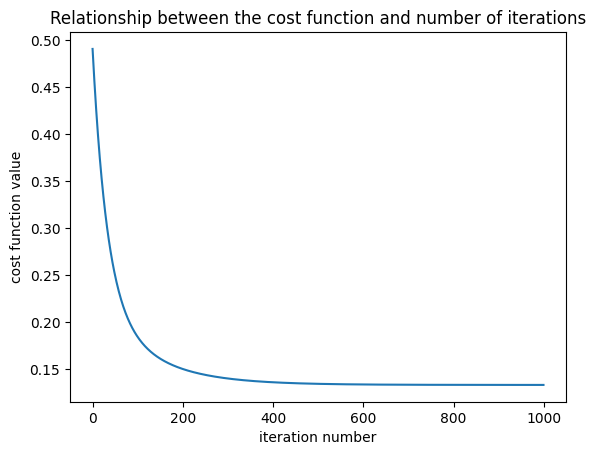

In [20]:
plt.plot(costs)
plt.title('Relationship between the cost function and number of iterations')
plt.ylabel('cost function value')
plt.xlabel('iteration number')
plt.show()

##### Metrics

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = np.sum(X * opt_theta, axis=0).reshape((1, -1))

print('MSE:', mean_squared_error(y, y_pred))
print('MAE:', mean_absolute_error(y, y_pred))

MSE: 0.26708357758152806
MAE: 0.4169751119623725


# Linear regression - Python packages

In [22]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data import
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Normalization
scaler = StandardScaler()
scaler.fit(diabetes_X)
X = scaler.transform(diabetes_X)
y = diabetes_y

# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creating an object
regr = linear_model.LinearRegression()

# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [  2.2531357   -8.14580997  24.62271703  18.03210277 -45.56259737
  25.22421128   7.55284663  10.80328822  33.07794457   3.12464167]
Residual sum of squares: 2316.955732863651
